> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: No-Show Appointments dataset analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show upfor their appointment.

### The no-show appointments dataset contains 14 columns which are:<a href="#The-no-show-appointments-dataset-contains-14-columns-which-are:" class="anchor-link">¶</a>

-   ### PatientId

      
    This is an identification of a patient

-   ### AppointmentId

      
    This is an identification of an appointment

-   ### Gender

      
    This column contains two value F and M which means Female and Male

-   ### ScheduledDay

      
    The day of the actuall appointment, when they have to visit the
    doctor

-   ### AppointmentDay

      
    The day someone called or registered the appointment, this is before
    appointment of course

-   ### Age

      
    The age of a patient

-   ### Neighbourhood

      
    Where the appointment takes place

-   ### Scholarship

      
    True of False

-   ### Hipertension

      
    True (The patient have hypertension) or False (The patient don't
    have hypertension)

-   ### Diabetes

      
    True (The patient have diabetes) or False (The patient don't have
    diabetes)

-   ### Alcoholism

      
    True (The patient have alcholism) or False (The patient don't have
    alcholism)

-   ### Handcap

      
    True (The patient have handicap) or False (The patient don't have
    handicap)

-   ### SMS\_received

      
    True (The patient have received SMS for the appointment) or False
    (The patient didn't received SMS for the appointment)

-   ### No-show

      
    True (The patient haven't shown in the appointment) or False (The
    patient have shown in the appointment)

### Question(s) for Analysis :<a href="#Question(s)-for-Analysis" class="anchor-link">¶</a>
<ul>
<li> What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?<a href="#What-factors-are-important-for-us-to-know-in-order-to-predict-if-a-patient-will-show-up-for-their-scheduled-appointment?" class="anchor-link">¶</a></li>

<li> Which gender show more to the appointment?<a href="#Which-gender-show-more-to-the-appointment?" class="anchor-link">¶</a></li>

<li>Does it matter to know if the patient show to the appointment by receiving his SMS or not?<a href="#Does-it-matter-to-know-if-the-patient-show-to-the-appointment-by-receiving-his-SMS-or-not?" class="anchor-link">¶</a></li>
</ul>

In [17]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 2.8MB/s eta 0:00:01   68% |██████████████████████          | 7.2MB 26.9MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.4MB/s eta 0:00:01   31% |██████████                      | 4.2MB 26.6MB/s eta 0:00:01    68% |██████████████████████          | 9.2MB 23.7MB/s eta 0:00:01    78% |█████████████████████████       | 10.5MB 26.5MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [18]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# making the patient id show the id without the e+1
pd.options.display.float_format = '{:.0f}'.format
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

        PatientId  AppointmentID Gender          ScheduledDay  \
0  29872499824296        5642903      F  2016-04-29T18:38:08Z   
1 558997776694438        5642503      M  2016-04-29T16:08:27Z   
2   4262962299951        5642549      F  2016-04-29T16:19:04Z   
3    867951213174        5642828      F  2016-04-29T17:29:31Z   
4   8841186448183        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0   

In [132]:
#getting information about this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [19]:
#checking duplicates in this dataset
df.duplicated().value_counts()

False    110527
dtype: int64

There is no duplicates in this dataset

In [20]:
#checking any missing values in this dataset
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There is no missing values in this dataset

In [21]:
#identfying the no. of unique values in 'PatientId' column
df['PatientId'].nunique()

62299

There is 62229 out of 110527 values which are 'PatientId' unique values

In [22]:
#identfying the no. of unique values in 'AppointmentID' column
df['AppointmentID'].nunique()

110527

all 'AppointmentID' values are unique

In [23]:
#identfying the no. of rows and columns in this dataset
df.shape

(110527, 14)

In this dataset there are 110527 rows and 14 columns

In [24]:
#description of this dataset
df.describe()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

            PatientId  AppointmentID    Age  Scholarship  Hipertension  \
count          110527         110527 110527       110527        110527   
mean  147496265710394        5675305     37            0             0   
std   256094920291739          71296     23            0             0   
min             39218        5030230     -1            0             0   
25%     4172614444192        5640286     18            0             0   
50%    31731838713978        5680573     37            0             0   
75%    94391720898175        5725524     55            0             0   
max   999981631772427        5790484    115            1             1   

       Diabetes  Alcoholism  Handcap  SMS_received  
count    110527      110527   110527        110527  
mean          0           0        0             0  
std           0           0        0             0  
min           0           0        0             0  
25%           0           0        0             0  
50%           0

From this description, we discovered that in the 'Age' column. 

The max is 115

The min is -1 (which is wrong and will be fixed in the data cleaning phase) 

And the mean of ages is 37

In [25]:
#identfying the error in the 'Age' column
df[df['Age']== -1]

TypeError: __init__() got an unexpected keyword argument 'max_rows'

            PatientId  AppointmentID Gender          ScheduledDay  \
99832 465943158731293        5775010      F  2016-06-06T08:58:13Z   

             AppointmentDay  Age Neighbourhood  Scholarship  Hipertension  \
99832  2016-06-06T00:00:00Z   -1         ROMÃO            0             0   

       Diabetes  Alcoholism  Handcap  SMS_received No-show  
99832         0           0        0             0      No  

In [26]:
#identifying the patients whose age are 115 years old
df[df['Age']== 115]

TypeError: __init__() got an unexpected keyword argument 'max_rows'

            PatientId  AppointmentID Gender          ScheduledDay  \
63912  31963211613981        5700278      F  2016-05-16T09:17:44Z   
63915  31963211613981        5700279      F  2016-05-16T09:17:44Z   
68127  31963211613981        5562812      F  2016-04-08T14:29:17Z   
76284  31963211613981        5744037      F  2016-05-30T09:44:51Z   
97666 748234579244724        5717451      F  2016-05-19T07:57:56Z   

             AppointmentDay  Age Neighbourhood  Scholarship  Hipertension  \
63912  2016-05-19T00:00:00Z  115    ANDORINHAS            0             0   
63915  2016-05-19T00:00:00Z  115    ANDORINHAS            0             0   
68127  2016-05-16T00:00:00Z  115    ANDORINHAS            0             0   
76284  2016-05-30T00:00:00Z  115    ANDORINHAS            0             0   
97666  2016-06-03T00:00:00Z  115      SÃO JOSÉ            0             1   

       Diabetes  Alcoholism  Handcap  SMS_received No-show  
63912         0           0        1             0     Yes  


There is 5 patients whose age are 115 years old

In [27]:
#identifying the no. of patients whether they have scholarship or not
df['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

There are 10861 patient who have scholarship and 99666 patient who don't
have scholarship

In [28]:
#identifying the no. of patients whether they have hypertension or not
df['Hipertension'].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

There are 21801 patient who suffer hypertension and 88726 patient who
don't suffer hypertension

In [29]:
#identifying the no. of patients whether they have diabetes or not
df['Diabetes'].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

There are 7943 patient who suffer diabetes and 102584 patient who don't
suffer diabetes

In [30]:
#identifying the no. of patients whether they have alcoholism or not
df['Alcoholism'].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

There are 3360 patient who have alcoholism and 107167 patient who don't
have alcoholism


In [31]:
#identifying the no. of patients who are handicapped or not
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

There are 5 levels of handicap which are:  

-   In level 0, there are 108286 who are not handicapped
-   There are 2042 patient who are level 1 handicapped
-   There are 183 patient who are level 2 handicapped
-   There are 13 patient who are level 3 handicapped
-   There are 4 patients who are level 4 handicapped


In [32]:
#identifying the no. of patients who have received SMS
df['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

There are 75045 patient who didn't receive message and 35482 patient who
received

In [33]:
#identifying the no. of patients who showed in their appointment
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

There are 22319 patient who didn't show and 88208 patient who shown in
their appointment

In [34]:
#identifying the no. of places of the appointment
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

There are 81 place for the appointment


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [35]:
# this is a function that changes a string
def change_string(col):
    '''changing ScheduledDay,AppointmentDay and No-show to Scheduled_Day,Appointment_Day and No_show '''
    if 'Day' in col: #this line for ScheduledDay,AppointmentDay
        col = (col[:-3] + '_' +col[-3:])
    col = col.strip().replace('-','_') #this line for No-show
    return col

#renaming columns
df.rename(columns=lambda column: change_string(column),inplace = True)  
df.head() 

TypeError: __init__() got an unexpected keyword argument 'max_rows'

        PatientId  AppointmentID Gender         Scheduled_Day  \
0  29872499824296        5642903      F  2016-04-29T18:38:08Z   
1 558997776694438        5642503      M  2016-04-29T16:08:27Z   
2   4262962299951        5642549      F  2016-04-29T16:19:04Z   
3    867951213174        5642828      F  2016-04-29T17:29:31Z   
4   8841186448183        5642494      F  2016-04-29T16:07:23Z   

        Appointment_Day  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No_show  
0         0           0        0             0      No  
1         0           0   

'ScheduledDay' ,'AppointmentDay','No-show' columns are renamed into 'Scheduled_Day','Appointment_Day','No_show'

In [36]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# renaming columns
df.rename(columns= {'PatientId':'Patient_ID','AppointmentID':'Appointment_ID','Hipertension':'Hypertension','Handcap':'Handicap'},inplace =  True)
#checking changes
df.head()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

       Patient_ID  Appointment_ID Gender         Scheduled_Day  \
0  29872499824296         5642903      F  2016-04-29T18:38:08Z   
1 558997776694438         5642503      M  2016-04-29T16:08:27Z   
2   4262962299951         5642549      F  2016-04-29T16:19:04Z   
3    867951213174         5642828      F  2016-04-29T17:29:31Z   
4   8841186448183         5642494      F  2016-04-29T16:07:23Z   

        Appointment_Day  Age      Neighbourhood  Scholarship  Hypertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handicap  SMS_received No_show  
0         0           0         0             0      No  
1         0       

The selected columns has been renamed

In [37]:
#dropping the 'Appointment_ID' column
df.drop(['Appointment_ID'],axis = 1,inplace = True)
#checking changes
df.head()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

       Patient_ID Gender         Scheduled_Day       Appointment_Day  Age  \
0  29872499824296      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62   
1 558997776694438      M  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   56   
2   4262962299951      F  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   62   
3    867951213174      F  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z    8   
4   8841186448183      F  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z   56   

       Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   Handicap  SMS_received No_show  
0         0             0      No  
1         0             0 

The 'AppointmentID' column has been deleted as it will not help in this
analysis

In [38]:
#fixing the age error
df.Age.replace({-1:0}, inplace = True)
#checking changes
df.describe()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

           Patient_ID    Age  Scholarship  Hypertension  Diabetes  Alcoholism  \
count          110527 110527       110527        110527    110527      110527   
mean  147496265710394     37            0             0         0           0   
std   256094920291739     23            0             0         0           0   
min             39218      0            0             0         0           0   
25%     4172614444192     18            0             0         0           0   
50%    31731838713978     37            0             0         0           0   
75%    94391720898175     55            0             0         0           0   
max   999981631772427    115            1             1         1           1   

       Handicap  SMS_received  
count    110527        110527  
mean          0             0  
std           0             0  
min           0             0  
25%           0             0  
50%           0             0  
75%           0             1  
max           

The min in 'Age' column becomes 0 not -1

In [39]:
#checking any duplicates after deleting the 'AppointmentID' column
df.duplicated().sum()

618

There are 618 duplicates in this dataset after deleting the
'AppointmentID' column

This could be an error, where in fact there should be one entry per
duplicate, but it also could be valid: patients can be scheduled for
more than one time. So, we will these duplicate values

In [40]:
#Assinging the patients who showed in their appointment as it will help us in our analysis
show = df.No_show == 'No'
#checking assigning
show

0          True
1          True
2          True
3          True
4          True
5          True
6         False
7         False
8          True
9          True
10         True
11        False
12         True
13         True
14         True
15         True
16         True
17        False
18         True
19         True
20        False
21        False
22        False
23         True
24         True
25         True
26         True
27         True
28         True
29         True
          ...  
110497     True
110498     True
110499     True
110500     True
110501     True
110502     True
110503     True
110504     True
110505     True
110506     True
110507     True
110508     True
110509     True
110510     True
110511     True
110512     True
110513     True
110514     True
110515    False
110516    False
110517     True
110518     True
110519     True
110520     True
110521     True
110522     True
110523     True
110524     True
110525     True
110526     True
Name: No_show, Length: 1

'show' variable will represent the who showed in the appointment

In [41]:
#Assinging the patients who didn't show in their appointment as it will help us in our analysis
No_show = df.No_show == 'Yes'
#checking assigning
No_show

0         False
1         False
2         False
3         False
4         False
5         False
6          True
7          True
8         False
9         False
10        False
11         True
12        False
13        False
14        False
15        False
16        False
17         True
18        False
19        False
20         True
21         True
22         True
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
110497    False
110498    False
110499    False
110500    False
110501    False
110502    False
110503    False
110504    False
110505    False
110506    False
110507    False
110508    False
110509    False
110510    False
110511    False
110512    False
110513    False
110514    False
110515     True
110516     True
110517    False
110518    False
110519    False
110520    False
110521    False
110522    False
110523    False
110524    False
110525    False
110526    False
Name: No_show, Length: 1

'No_show' variable will represent the who didn't show in the appointment

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?)

In [42]:
#this is a function that makes a histogram chart
def hist_plot(col_name,show,no_show,title,xlabel,ylabel):
    '''making a histogram'''
    col_name[show].hist(alpha = 0.5 ,label ='show',bins=20)
    col_name[No_show].hist(alpha = 0.5 ,label ='No show',bins=20)
    plt.legend()
    plt.title(title) #title of the chart
    plt.xlabel(xlabel)# x-axis label of the chart
    plt.ylabel(ylabel);# y-axis label of the chart

This is a histogram 

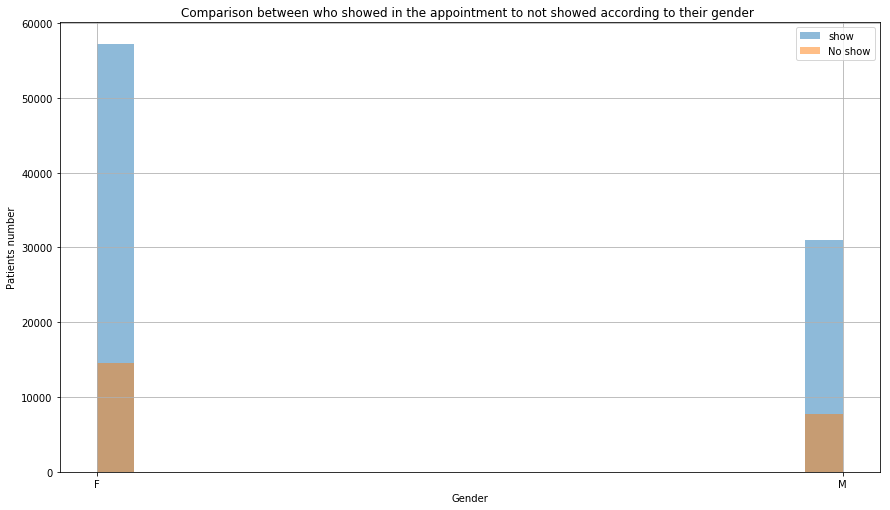

In [43]:
 # this is a Comparison between who showed in the appointment to not showed according to their gender
plt.figure(figsize=[14.70,8.27])
title='Comparison between who showed in the appointment to not showed according to their gender '
xlabel = 'Gender'
ylabel = 'Patients number'
hist_plot(df.Gender,show,No_show,title,xlabel,ylabel)

There is no connection between the gender of a patient and the showing or non-showing in the appointment 

But, it showed us that females show in the appointment more than males  

And also females don't show in the appointment more than males

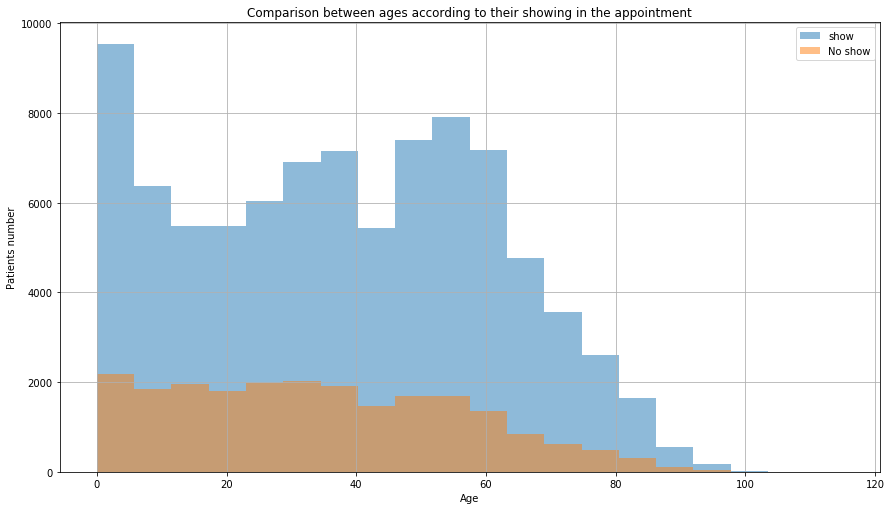

In [44]:
# this is a comparison between ages according to their showing in the appointment
plt.figure(figsize=[14.70,8.27])
title='Comparison between ages according to their showing in the appointment'
xlabel = 'Age'
ylabel = 'Patients number'
hist_plot(df.Age,show,No_show,title,xlabel,ylabel)

There is a connection between the age of a patient and the showing or non-showing in the appointment 

As the older the patient, the less he can show in the appointment  

In this chart, we can see that the most age of a patient show in the appointment is from 0-10 years old  

Then, from 35-70 years old

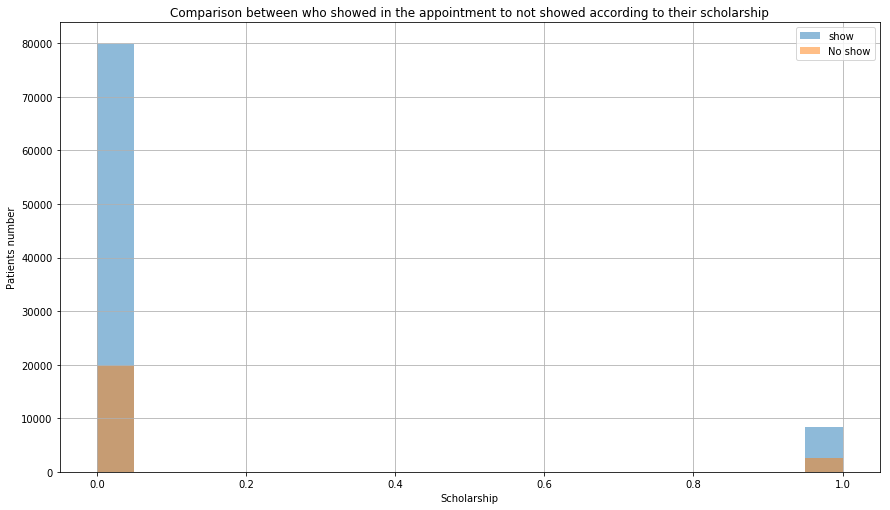

In [45]:
# this is a comparison between who showed in the appointment to not showed according to their scholarship
plt.figure(figsize=[14.70,8.27])
title='Comparison between who showed in the appointment to not showed according to their scholarship'
xlabel = 'Scholarship'
ylabel = 'Patients number'
hist_plot(df.Scholarship,show,No_show,title,xlabel,ylabel)


There is no connection between the scholarship and the showing or non-showing in the appointment

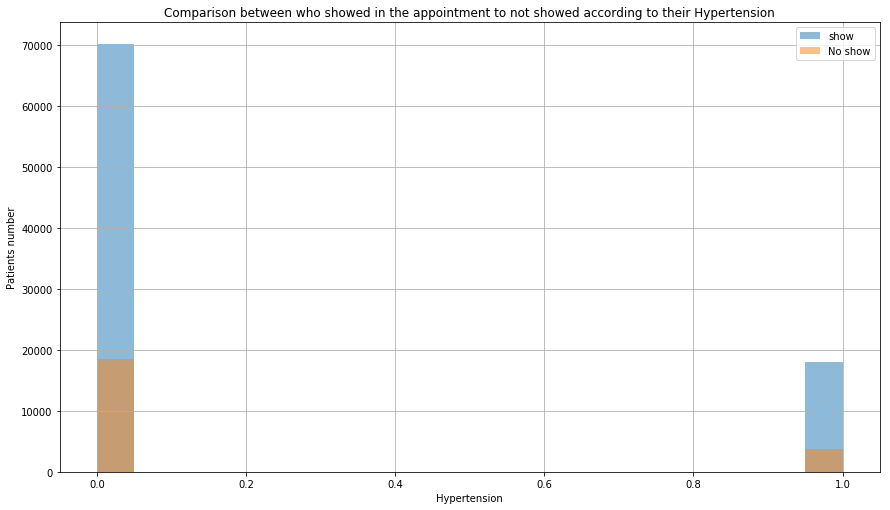

In [46]:
#this is a comparison between who showed in the appointment to not showed according to their Hypertension
plt.figure(figsize=[14.70,8.27])
title = 'Comparison between who showed in the appointment to not showed according to their Hypertension'
xlabel = 'Hypertension'
ylabel = 'Patients number'
hist_plot(df.Hypertension,show,No_show,title,xlabel,ylabel)

There is no connection between the hypertension of a patient and the showing or non-showing in the appointment

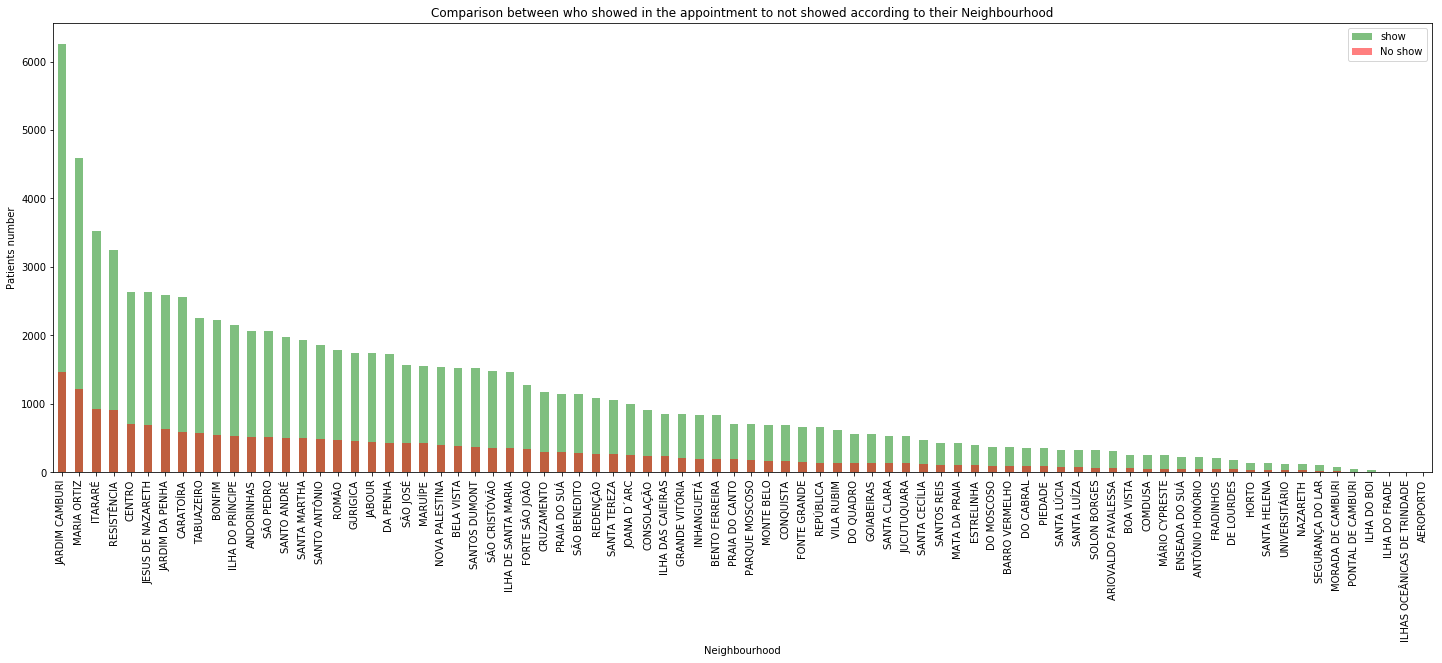

In [47]:
# this is a comparison between who showed in the appointment to not showed according to their Neighbourhood
plt.figure(figsize=[24.70,8.27])
df.Neighbourhood[show].value_counts().plot(kind='bar',alpha = 0.5 ,label ='show',color='green')
df.Neighbourhood[No_show].value_counts().plot(kind='bar',alpha = 0.5 ,label ='No show',color='red')
plt.legend()
plt.title('Comparison between who showed in the appointment to not showed according to their Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients number');

There is connection between the neighbourhood and the showing or non-showing in the appointment  

But, the most neighbourhood place that the patient go to the appointment is Jardim Camburi

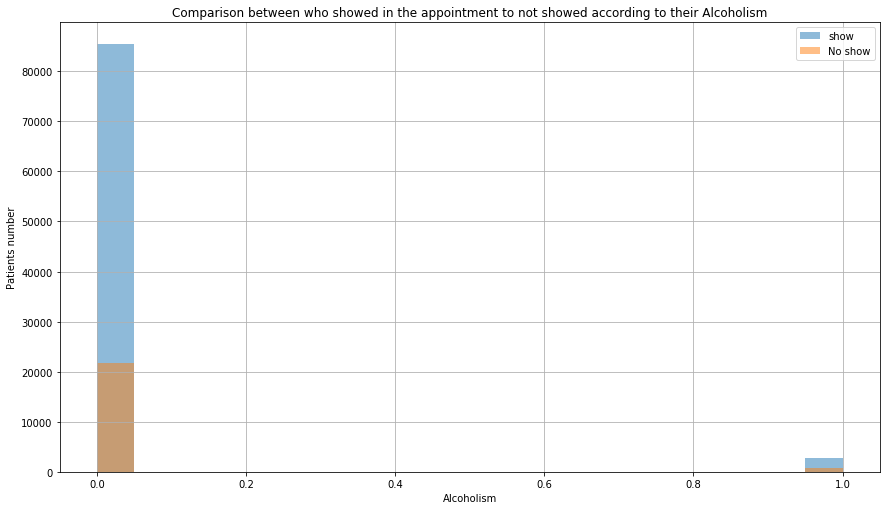

In [48]:
# this is a comparison between who showed in the appointment to not showed according to their Alcoholism
plt.figure(figsize=[14.70,8.27])
title='Comparison between who showed in the appointment to not showed according to their Alcoholism'
xlabel = 'Alcoholism'
ylabel = 'Patients number'
hist_plot(df.Alcoholism,show,No_show,title,xlabel,ylabel)

There is no connection between the alcoholism of a patient and the showing or non-showing in the appointment


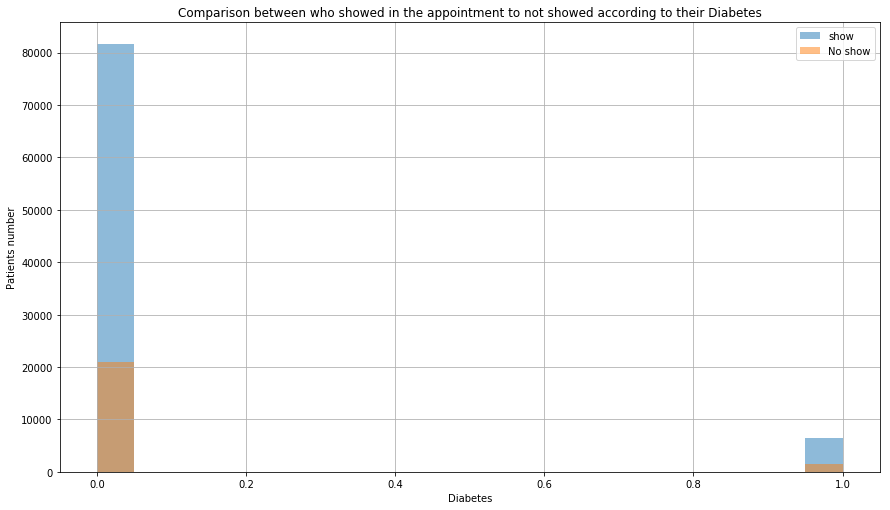

In [49]:
# this is a comparison between who showed in the appointment to not showed according to their Diabetes
plt.figure(figsize=[14.70,8.27])
title='Comparison between who showed in the appointment to not showed according to their Diabetes'
xlabel = 'Diabetes'
ylabel = 'Patients number'
hist_plot(df.Diabetes,show,No_show,title,xlabel,ylabel)

There is no connection between the patient's diabetes and the showing or non-showing in the appointment

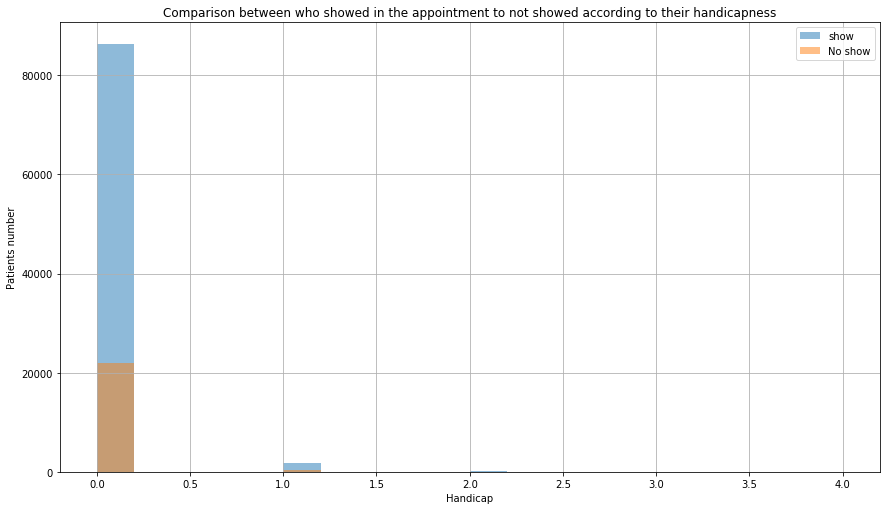

In [50]:
# this is a comparison between who showed in the appointment to not showed according to their handicapness
plt.figure(figsize=[14.70,8.27])
title='Comparison between who showed in the appointment to not showed according to their handicapness'
xlabel = 'Handicap'
ylabel = 'Patients number'
hist_plot(df.Handicap,show,No_show,title,xlabel,ylabel)

There is no connection between the handicapness of a patient and the showing or non-showing in the appointment

### Research question 2 (Which gender show more to the appointment?)

In [51]:
def pie_plot(arr,label):
    plt.pie(arr,label,autopct='%1.0f%%')

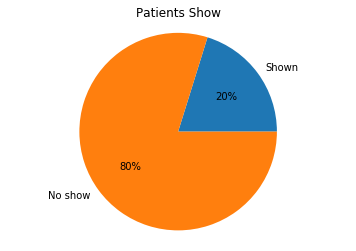

In [52]:
# this is a porportion of patient who showed to the appointment to not showed
Patients_Show = [No_show.mean(),show.mean()]

my_labels = 'Shown','No show'
plt.pie(Patients_Show,labels=my_labels,autopct='%1.0f%%')
plt.title('Patients Show')
plt.axis('equal')
plt.show()

There is 20 % of patients who showed in the appointment, while 80 % of
the patients who didn't show in the appointment

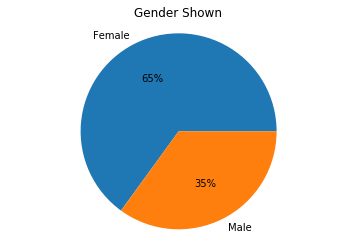

In [53]:
#this is a porportion of most gender who showed to the appointment
Gender_Show = df['Gender'].value_counts()

my_labels = 'Female','Male'
plt.pie(Gender_Show,labels=my_labels,autopct='%1.0f%%')
plt.title('Gender Shown')
plt.axis('equal')
plt.show()

There is 65 % of patients who showed in the appointment are females, while 35 % of the patients who show in the appointment are males 

Which means that females are more showing than males in the appointment

### Research question3(Does it matter to know if the patient show to the appointment by receiving his SMS or not?)

In [54]:
# assigning a variable that collects all the patients who received SMS
Received_SMS = df[df['SMS_received']== 1]
Received_SMS

TypeError: __init__() got an unexpected keyword argument 'max_rows'

            Patient_ID Gender         Scheduled_Day       Appointment_Day  \
11       7542951368435      M  2016-04-26T08:44:12Z  2016-04-29T00:00:00Z   
15         99948393975      F  2016-04-26T08:47:27Z  2016-04-29T00:00:00Z   
18      17135378245248      F  2016-04-26T10:54:18Z  2016-04-29T00:00:00Z   
22     863229818887631      M  2016-04-25T13:29:16Z  2016-04-29T00:00:00Z   
25       5819369978796      M  2016-04-26T15:04:17Z  2016-04-29T00:00:00Z   
33       7653516999712      F  2016-04-25T15:01:04Z  2016-04-29T00:00:00Z   
38       5873315843778      M  2016-04-20T15:54:18Z  2016-04-29T00:00:00Z   
46        137943696338      M  2016-04-25T12:44:36Z  2016-04-29T00:00:00Z   
48       8545415176986      F  2016-04-26T07:19:49Z  2016-04-29T00:00:00Z   
49      92235587471561      F  2016-03-31T17:11:17Z  2016-04-29T00:00:00Z   
50     182717227234941      F  2016-03-31T17:12:45Z  2016-04-29T00:00:00Z   
51      46946985511333      F  2016-03-31T17:05:31Z  2016-04-29T00:00:00Z   

'Received_SMS' variable will represent the patients who received SMS for the appointment

In [55]:
# assigning a variable that collects all the patients who didn't received SMS
No_Received_SMS = df[df['SMS_received']== 0]
No_Received_SMS

TypeError: __init__() got an unexpected keyword argument 'max_rows'

            Patient_ID Gender         Scheduled_Day       Appointment_Day  \
0       29872499824296      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   
1      558997776694438      M  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   
2        4262962299951      F  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   
3         867951213174      F  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z   
4        8841186448183      F  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z   
5       95985133231274      F  2016-04-27T08:36:51Z  2016-04-29T00:00:00Z   
6      733688164476661      F  2016-04-27T15:05:12Z  2016-04-29T00:00:00Z   
7        3449833394123      F  2016-04-27T15:39:58Z  2016-04-29T00:00:00Z   
8       56394729949972      F  2016-04-29T08:02:16Z  2016-04-29T00:00:00Z   
9       78124564369297      F  2016-04-27T12:48:25Z  2016-04-29T00:00:00Z   
10     734536231958495      F  2016-04-27T14:58:11Z  2016-04-29T00:00:00Z   
12     566654781423437      F  2016-04-28T11:33:51Z  2016-04-29T00:00:00Z   

'No_Received_SMS' variable will represent the patients who didn't receive SMS for the appointment

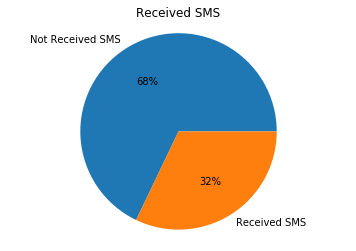

In [56]:
# this is a proportion of the patients who received SMS to not received SMS
Patient_Received_SMS = df['SMS_received'].value_counts()

my_labels = 'Not Received SMS','Received SMS'
plt.pie(Patient_Received_SMS,labels=my_labels,autopct='%1.0f%%')
plt.title('Received SMS')
plt.axis('equal')
plt.show()

There is 68 % of patients who didn't receive SMS, while 32 % of the
patients who received SMS

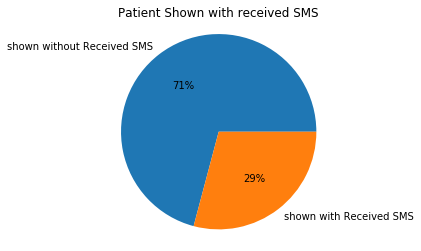

In [57]:
# this is a proportion of the patients who showed with received SMS to showed without received SMS
show_Received = show.groupby(df.SMS_received).sum()

my_labels = 'shown without Received SMS','shown with Received SMS'
plt.pie(show_Received,labels=my_labels,autopct='%1.0f%%')
plt.title('Patient Shown with received SMS')
plt.axis('equal')
plt.show()

There is 71 % of patients who show in the appointment without receiving
SMS, while 29 % of the patients show in the appointment with receiving
SMS

Which is weird

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

It is concluded that:

-   The neighbourhood is strongly connected to the patient's attending
    to the medical appointment
-   The most age of a patient show in the appointment is from 0-10 years
    old, then next from 35-70 years old
-   The females showing more than males in the appointment, which means
    that the females are more prone to diseases than males or the
    females care about their health more than males
-   It is strange, but most patients show in the appointment without
    receiving SMS

#### Limitations:<a href="#Limitations:" class="anchor-link">¶</a>

There is no correlation between the patient's showing or not showing in
the appointment with other characteristics like disability, being
enrolled in the brasilian welfare program or diseases

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [58]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0